In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv(r"C:\c\housing data.csv")
data.head()

,SquareFeet,Price
0,1260,146600
1,3674,408300
2,1356,154400
3,3182,350800
4,2302,267500


In [19]:
X=np.array(data["SquareFeet"])
y=np.array(data["Price"])
X.shape , y.shape


((91,), (91,))

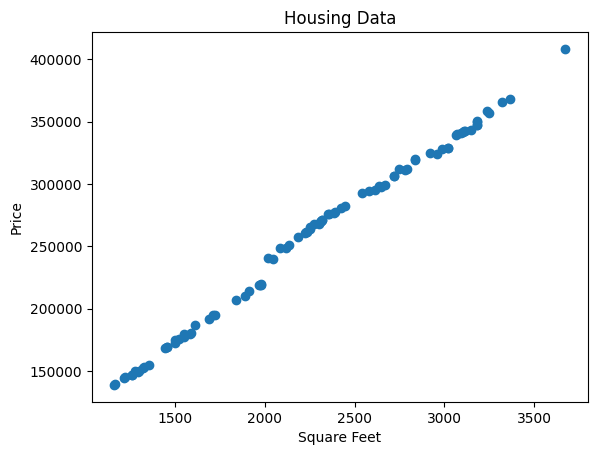

In [27]:
plt.scatter(X, y)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Housing Data")
plt.show()

In [34]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost =0
    for i in range(m):
        f_wb=X[i]*w +b
        cost=cost + (f_wb - y[i])**2
    total_cost=(1/(2 * m )) * cost
    return total_cost
        

In [35]:
def compute_gradient(X,y,w,b):
    m=X.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=X[i]*w +b
        dj_dw= dj_dw + (f_wb - y[i]) * X[i]
        dj_db= dj_db + (f_wb - y[i])
    dj_dw=dj_dw / m
    dj_db=dj_db /m

    return dj_dw,dj_db
        

In [36]:
def gradient_descent(X,y,w_init,y_init,learning_rate,iterations,compute_gradient,compute_cost):
    w=w_init
    b=b_init

    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(X,y,w,b)
        w=w - (learning_rate * dj_dw)
        b=b - (learning_rate * dj_db)

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")
    return w,b
    

In [41]:
w_init=0
b_init=0
iterations=1000
learning_rate=0.0000001
w_opt, b_opt = gradient_descent(X, y, w_init, b_init, learning_rate, iterations,compute_gradient ,compute_cost)

print(f"Optimized parameters: w = {w_opt}, b = {b_opt}")

Iteration 0: Cost 6989857956.84429, w 62.87302351648352, b 0.025698681318681315
Iteration 100: Cost 26181130.766570862, w 112.87703616506668, b 0.05870583750999845
Iteration 200: Cost 26181114.715462875, w 112.8770310121559, b 0.07137513324712576
Iteration 300: Cost 26181098.664380103, w 112.87702585924916, b 0.08404441902907779
Iteration 400: Cost 26181082.613322437, w 112.87702070634647, b 0.09671369485586234
Iteration 500: Cost 26181066.562290046, w 112.87701555344783, b 0.10938296072748725
Iteration 600: Cost 26181050.51128301, w 112.87701040055325, b 0.12205221664396038
Iteration 700: Cost 26181034.46030103, w 112.87700524766271, b 0.1347214626052894
Iteration 800: Cost 26181018.409344357, w 112.87700009477622, b 0.1473906986114823
Iteration 900: Cost 26181002.358412817, w 112.87699494189377, b 0.16005992466254676
Optimized parameters: w = 112.87698984054414, b = 0.1726024486468091


In [46]:
print(f"1500 sqft house prediction {w_opt*1260 + b_opt:0.1f}  dollars")

1500 sqft house prediction 142225.2  dollars


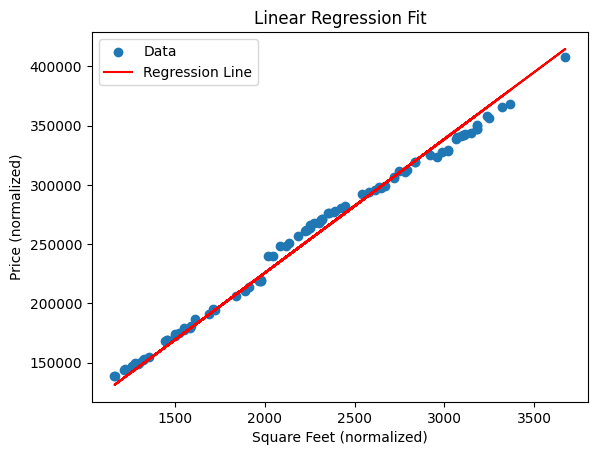

In [47]:
# Plot the regression line
plt.scatter(X, y, label="Data")
plt.plot(X, w_opt * X + b_opt, color="red", label="Regression Line")
plt.xlabel("Square Feet (normalized)")
plt.ylabel("Price (normalized)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()